
<br><p style="font-family: Arial; font-size:3.75em;color:red; font-style:bold">
Data Visualization<br> <br> <br>Matplotlib, Seaborn and Folium</p><br>
<p style="font-family: Arial;font-style: bold;font-size:2.5em;color:blue">
    Python Abia</p>
<p style="color:green">Presentation by Celestine</p>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

Data Source: https://www.kaggle.com/worldbank/world-development-indicators

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv') #to access the dataset
data.shape #this shows you the dimension of the dataframe

(5656458, 6)

In [3]:
data.size #this returns the total number of elements that is 5656458 * 6

33938748

In [4]:
data.head(5) #this shows you the first 5 items in a dataframe

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
indicator = 'GDP per capita \(constant 2005'
country = 'NGA'

GDP = data['IndicatorName'].str.contains(indicator) 
Naija = data['CountryCode'].str.contains(country)


In [6]:
gdp_stage = data[GDP & Naija]

In [7]:
gdp_stage.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16671,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,559.194584
42298,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,548.944501
70224,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,559.658099
98788,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,594.909205
127719,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,611.136904


### LINE PLOT

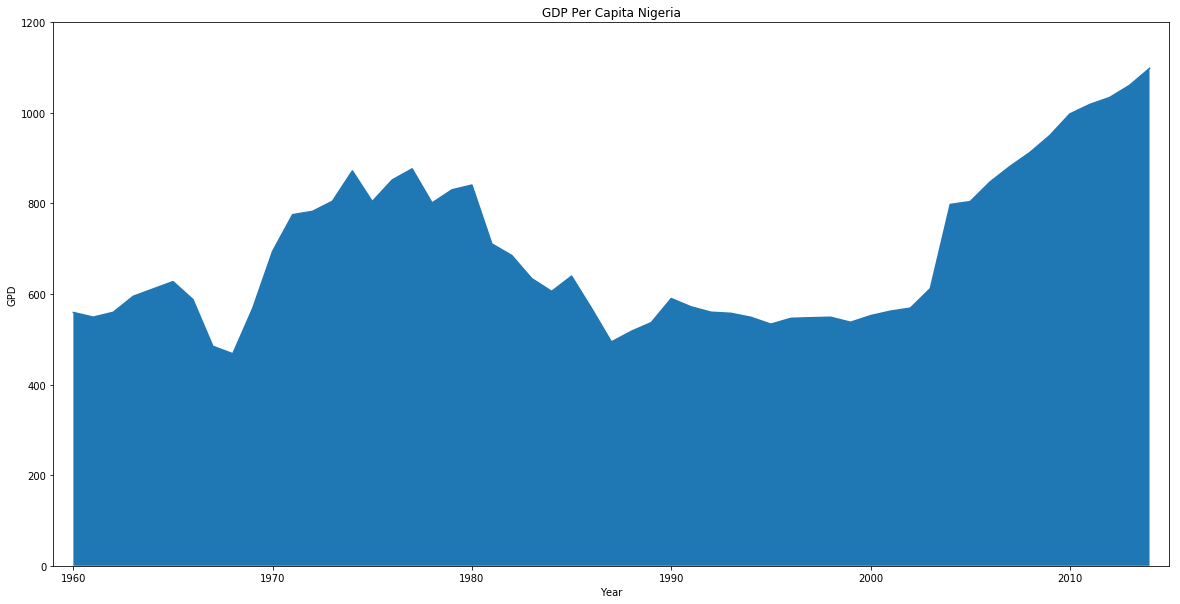

In [8]:
#line plot
fig = plt.figure(figsize=(20,10))
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('GPD')

#label the figure
plt.title('GDP Per Capita Nigeria')

plt.axis([1959, 2015,0,1200]), plt.fill_between(gdp_stage['Year'].values, 0, gdp_stage['Value'].values)

plt.show()

### SCATTER PLOT

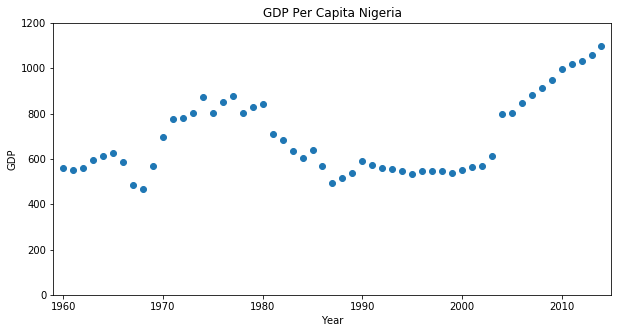

In [9]:
# scatter plot
fig = plt.figure(figsize=(10,5))
plt.scatter(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('GDP')

#label the figure
plt.title('GDP Per Capita Nigeria')
plt.axis([1959, 2015,0,1200])

plt.show()

### SACTTER PLOT ON POLAR AXIS

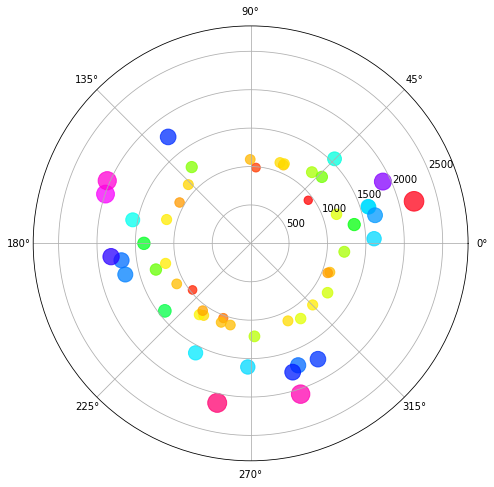

In [10]:
# Scatter plot on Polar Axis
r = 2 * gdp_stage['Value'].values
colors = 2 * np.pi * gdp_stage['Value'].values
area = .00008 * r**2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(colors, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### HISTOGRAM

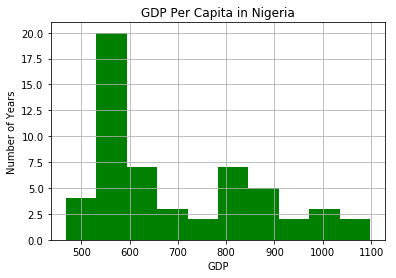

In [11]:
# the histogram of the data
hist_data = gdp_stage['Value'].values
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel('GDP')
plt.ylabel('Number of Years')
plt.title('GDP Per Capita in Nigeria')

plt.grid(True)

plt.show()

### 3D VISUALIZATION USING MATPOTLIB

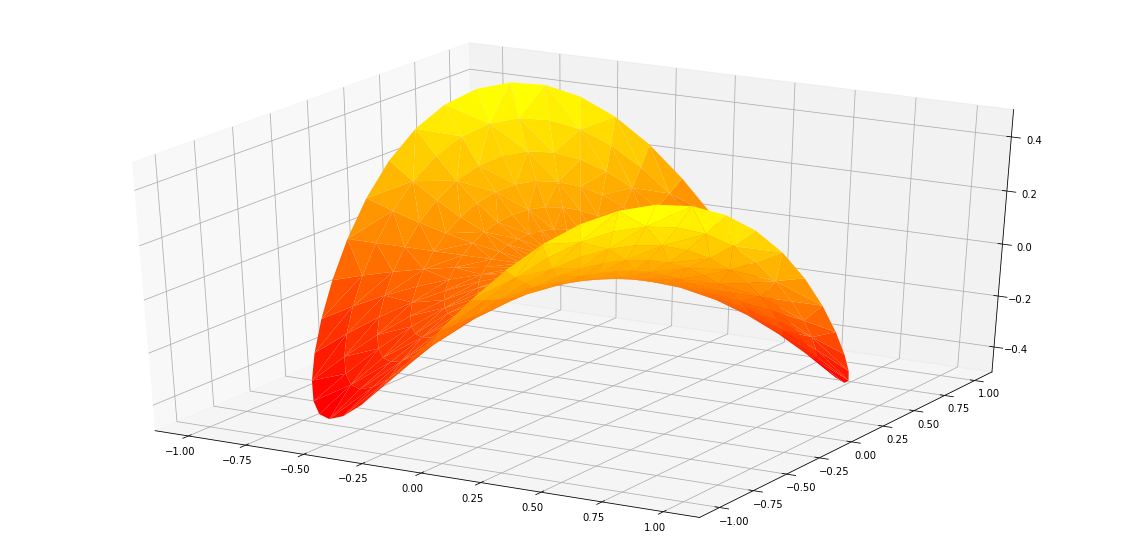

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

countof_angles = 48
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()

## SEABORN
### BAR PLOT

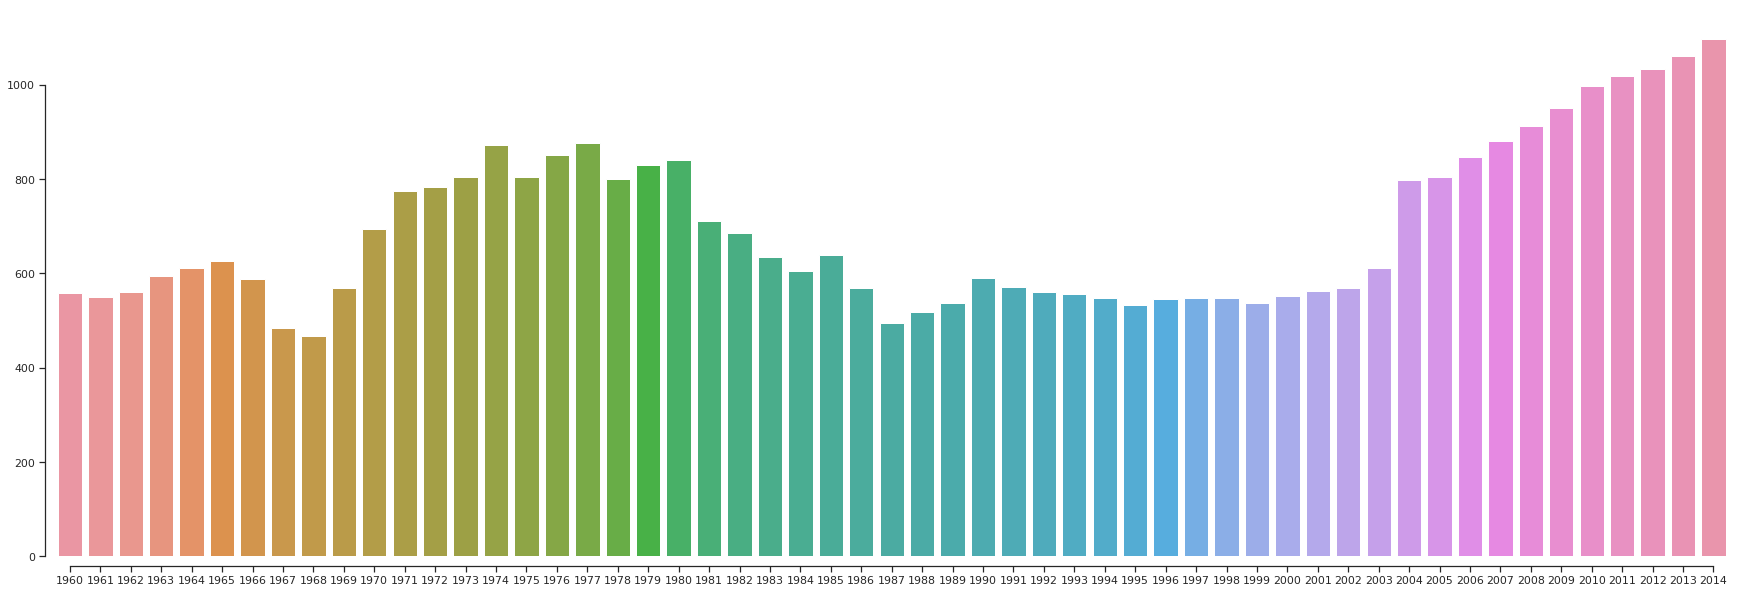

In [13]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")
sns.set_context("notebook")# for scaling plot element
fig = plt.figure(figsize=(30,10))

sns.barplot(x=gdp_stage['Year'].values, y=gdp_stage['Value'].values, data=gdp_stage)
sns.despine(offset=10, trim=True, bottom=False)

## FOLIUM

In [14]:
import folium

In [15]:
country_geo = 'world-countries.json'

#### Country coordinates for plotting

source: https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json

In [16]:
data = pd.read_csv('world-development-indicators/Indicators.csv')

In [17]:
year = 2010

mask1 = data['IndicatorName'].str.contains(indicator) 
mask2 = data['Year'].isin([year])

# apply our mask
stage = data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839188,Arab World,ARB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,4285.818965
4839728,Caribbean small states,CSS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,7309.906447
4840312,Central Europe and the Baltics,CEB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,9763.560846
4840962,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,5669.091316
4841634,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2010,2511.589009


In [18]:
plot_data = stage[['CountryCode','Value']]
plot_data.head()

,CountryCode,Value
4839188,ARB,4285.818965
4839728,CSS,7309.906447
4840312,CEB,9763.560846
4840962,EAS,5669.091316
4841634,EAP,2511.589009


In [19]:
# label for the legend
indicator = stage.iloc[0]['IndicatorName']

In [20]:
map = folium.Map(location=[100, 0], zoom_start=1.5)

In [21]:
# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
folium.Choropleth('world-countries.json',
 name='choropleth',
 data=plot_data,
 columns=['CountryCode', 'Value'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name=indicator
).add_to(map)


In [22]:
# Create Folium plot
map.save('plot_data.html')

In [23]:
map